# Zillow Data (Initial Exploration)

Import the python scientific suite

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

import datetime
from astropy.time import Time, TimeDelta

import statsmodels.api as smf #import statsmodels

In [6]:
file_dir = '/Volumes/1TB_BAY/zillow_sets/' #on my computer, locate the zillow directory

In [3]:
ls /Volumes/1TB_BAY/zillow_sets/

Neighborhood_HomesSoldAsForeclosures-Ratio_AllHomes.csv
Neighborhood_MedianRentalPricePerSqft_1Bedroom.csv
Neighborhood_MedianRentalPricePerSqft_2Bedroom.csv
Neighborhood_MedianRentalPricePerSqft_3Bedroom.csv
Neighborhood_MedianRentalPricePerSqft_4Bedroom.csv
Neighborhood_MedianRentalPricePerSqft_5BedroomOrMore.csv
Neighborhood_MedianRentalPricePerSqft_AllHomes.csv
Neighborhood_MedianRentalPricePerSqft_Studio.csv
Neighborhood_MedianRentalPrice_1Bedroom.csv
Neighborhood_MedianRentalPrice_2Bedroom.csv
Neighborhood_MedianRentalPrice_3Bedroom.csv
Neighborhood_MedianRentalPrice_4Bedroom.csv
Neighborhood_MedianRentalPrice_5BedroomOrMore.csv
Neighborhood_MedianValuePerSqft_AllHomes.csv
Neighborhood_Zhvi_1bedroom.csv
Neighborhood_Zhvi_2bedroom.csv
Neighborhood_Zhvi_3bedroom.csv
Neighborhood_Zhvi_4bedroom.csv
Neighborhood_Zhvi_AllHomes.csv


In [53]:
#file_type = 'Neighborhood_MedianRentalPrice_'
#file_type = 'Neighborhood_MedianValuePerSqft_'
home_type = 'AllHomes'

d = pd.read_csv(file_dir + file_type + home_type + '.csv') #read in file to dataframe

In [54]:
dt = d.T #looks like the data will be more intelligible to us if we transpose it
ts_start_month = dt.index[7] #what is the starting month of the time series?
print(ts_start_month)

1996-04


In [55]:
dt

,0,1,2,3,4,5,6,7,8,9,...,5934,5935,5936,5937,5938,5939,5940,5941,5942,5943
RegionID,274772,192689,112345,27080,118208,192820,194430,192796,268496,112547,...,753828,753830,753831,753832,753833,753835,753836,753838,753840,753841
RegionName,Northeast Dallas,Paradise,Maryvale,Sherman Oaks,South Los Angeles,Sunrise Manor,East New York,Spring Valley,Southeast Los Angeles,Paradise Valley,...,Wissahickon Hills,Melrose Park Gardens,Andorra,Upper Roxborough,Dearnley Park,Germany Hill,Paschall,Northern Liberties,Normandy Village,Parkwood Manor
City,Dallas,Las Vegas,Phoenix,Los Angeles,Los Angeles,Las Vegas,New York,Las Vegas,Los Angeles,Phoenix,...,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia
State,TX,NV,AZ,CA,CA,NV,NY,NV,CA,AZ,...,PA,PA,PA,PA,PA,PA,PA,PA,PA,PA
Metro,Dallas-Fort Worth,Las Vegas,Phoenix,Los Angeles-Long Beach-Anaheim,Los Angeles-Long Beach-Anaheim,Las Vegas,New York,Las Vegas,Los Angeles-Long Beach-Anaheim,Phoenix,...,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia
CountyName,Dallas,Clark,Maricopa,Los Angeles,Los Angeles,Clark,Kings,Clark,Los Angeles,Maricopa,...,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia,Philadelphia
SizeRank,1,2,3,4,5,6,7,8,9,10,...,5935,5936,5937,5938,5939,5940,5941,5942,5943,5944
1996-04,NaN,75,43,124,91,66,NaN,79,94,70,...,75,54,78,70,62,62,31,NaN,71,60
1996-05,NaN,74,44,125,92,67,NaN,78,94,70,...,75,54,78,70,62,63,31,NaN,71,60
1996-06,NaN,74,44,126,93,67,NaN,78,95,70,...,75,53,78,70,62,63,30,NaN,70,60


In [56]:
names = dt[:6] #separate out the string data from the timeseries
ts = dt[6:] #just the timeseries

tnames = names.T #create an un-transposed names copy. This will be useful later.

In [57]:
t_start = Time(datetime.datetime(1996,4,15)) #create the start time
t_int = TimeDelta(30.4166, format = 'jd') #time interval between a month

t_abcissa = [] #create empty list to hold time time objects

for i in range(len(ts)):
    t_abcissa.append(t_start + i*t_int) #add a month for each datapoint
    
t_column = [] #empty array to hold the timeseries

for t in t_abcissa: #for each time
    t_column.append(t.jd) #convert the time to jd and add it to a new column
    
#add the column back into that dataframe
ts.loc[:,'time'] = pd.Series(np.array(t_column) - 2.455e6, index = ts.index) 

In [30]:
def FitPriceLine(tnames, ts):
    
    lin_trend = [] #create an empty array to store information about our linear fits

    for i in range(len(tnames) - 1): # for every 'hood
    
        #define a 'hood name, county and metro, so we can append it to our dataset :
        name = str(tnames['RegionName'][i]) 
        county = str(tnames['CountyName'][i])  
        metro = str(tnames['Metro'][i])
    
        mean_price = np.mean(ts[i]) #calculate a mean price, for starters
    
        #create a clean little DataFrame for fitting our line with statsmodels.
        f = ts[['time', i]].dropna().rename(columns = {i: 'price'}).apply(pd.to_numeric, errors = 'coerce')
    
        #create some input arrays for statsmodels, for whatever reason it is not liking working with Dataframes
        X = np.array(f['time'])
        y = np.array(f['price']) 
        Xc = smf.add_constant(X) #add a constant into the model so that we can fit for the intercept
    
        #extract the time range of the observations that the fit is based on
        t_range = max(f['time']) - min(f['time']) 
        min_t = min(f['time']) #extract the time of the first observation
    
        lin = smf.OLS(y,Xc).fit() #actually do the fit, price = a_1*time + a_2
    
        #extract the standard error of our points around the linear fit, assuming homoscedasticity:
        std_err = np.std(y - lin.predict(Xc))
    
        lin_trend.append(np.hstack((name,county,metro,mean_price,min_t,t_range,lin.params,lin.bse,lin.rsquared,std_err,lin.nobs))) #add our results into an array

    l = pd.DataFrame(lin_trend) #create a tidy little dataframe out of this linear fit data
    l = l.apply(pd.to_numeric, errors = 'ignore') #convert to numeric type

    #let's give this new dataframe some intelligible column names
    l.rename(columns = {0: 'Name', 1: 'County', 2:'Metro', 3: 'mean_price', 4: 'min_t',\
                        5: 't_range', 6:'intercept',\
                        7: 'price_trend', 8:'intercept_err',\
                        9: 'price_trend_err', 10: 'rsquared',\
                        11:'std_err', 12: 'nobs'}, inplace = True)

    #let's create some machinery for exporting our fits in a .csv file
    l_export = l.copy() #copy the dataframe into one that will be exported

    for column in l_export.columns[3:]: #exclude the name column from this renaming
        l_export.rename(columns = {column: column + '_' + home_type}, inplace = True) #tag this csv with the home_type
    
    return l_export


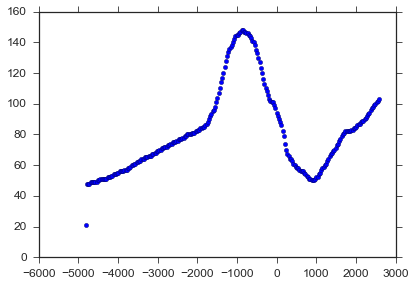

In [59]:
plt.scatter(ts['time'],ts[20])

In [31]:
FitPriceLine(tnames,ts)

,Name,County,Metro,mean_price_1Bedroom,min_t_1Bedroom,t_range_1Bedroom,intercept_1Bedroom,price_trend_1Bedroom,intercept_err_1Bedroom,price_trend_err_1Bedroom,rsquared_1Bedroom,std_err_1Bedroom,nobs_1Bedroom
0,Northeast Dallas,Dallas,Dallas-Fort Worth,812.052632,2430.662777,547.498800,1121.296115,-0.114348,184.110817,0.067949,0.142798,46.674502,19
1,Paradise,Clark,Las Vegas,665.416667,1001.082600,1977.078977,454.150597,0.106184,22.271269,0.010747,0.604003,49.819581,66
2,Upper West Side,New York,New York,3024.980519,666.500000,2311.661577,2564.655541,0.252602,24.535848,0.012623,0.842248,73.905928,77
3,Sherman Oaks,Los Angeles,Los Angeles-Long Beach-Anaheim,1421.232759,1244.415388,1733.746188,896.529722,0.248523,31.552752,0.014528,0.839367,55.359248,58
4,Upper East Side,New York,New York,2593.069231,1031.499200,1946.662377,2115.328372,0.238295,30.088832,0.014435,0.812236,65.382644,65
5,East New York,Kings,New York,1256.122642,1396.498388,1581.663188,747.134699,0.232698,40.761006,0.018227,0.761664,60.565372,53
6,Paradise Valley,Maricopa,Phoenix,852.000000,2126.496788,851.664788,617.582710,0.091844,95.494228,0.037230,0.183941,49.230463,29
7,Deer Valley,Maricopa,Phoenix,775.880952,2369.829577,608.332000,-15.787120,0.296062,106.622647,0.039780,0.744594,31.936270,21
8,Washington Heights,New York,New York,1462.537313,970.666000,2007.495577,1082.785142,0.192337,9.743344,0.004729,0.962186,22.428846,67
9,Van Nuys,Los Angeles,Los Angeles-Long Beach-Anaheim,1079.245614,1274.831988,1703.329588,525.153322,0.260566,28.344579,0.012975,0.879992,48.151623,57


In [106]:
l_export.to_csv(file_type + home_type + '_fits.csv', index = 'idx', float_format = '%.3f')

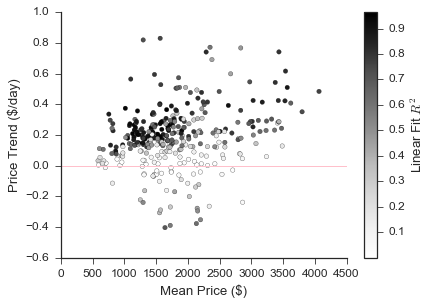

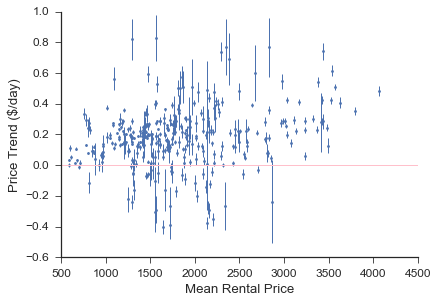

In [18]:
plt.figure()
plt.scatter(l['mean_price'],l['price_trend'], c = l['rsquared'])
plt.xlabel('Mean Price ($)')
plt.ylabel('Price Trend ($/day)')
plt.axhline(0, lw = 1, c = 'pink')
sns.despine()
plt.colorbar(label = 'Linear Fit $R^{2}$')

plt.figure()
plt.errorbar(l['mean_price'],l['price_trend'], l['price_trend_err'],fmt = '.', lw = 1)
plt.axhline(0, lw = 1, c = 'pink')
plt.xlabel('Mean Rental Price')
plt.ylabel('Price Trend ($/day)')
sns.despine()

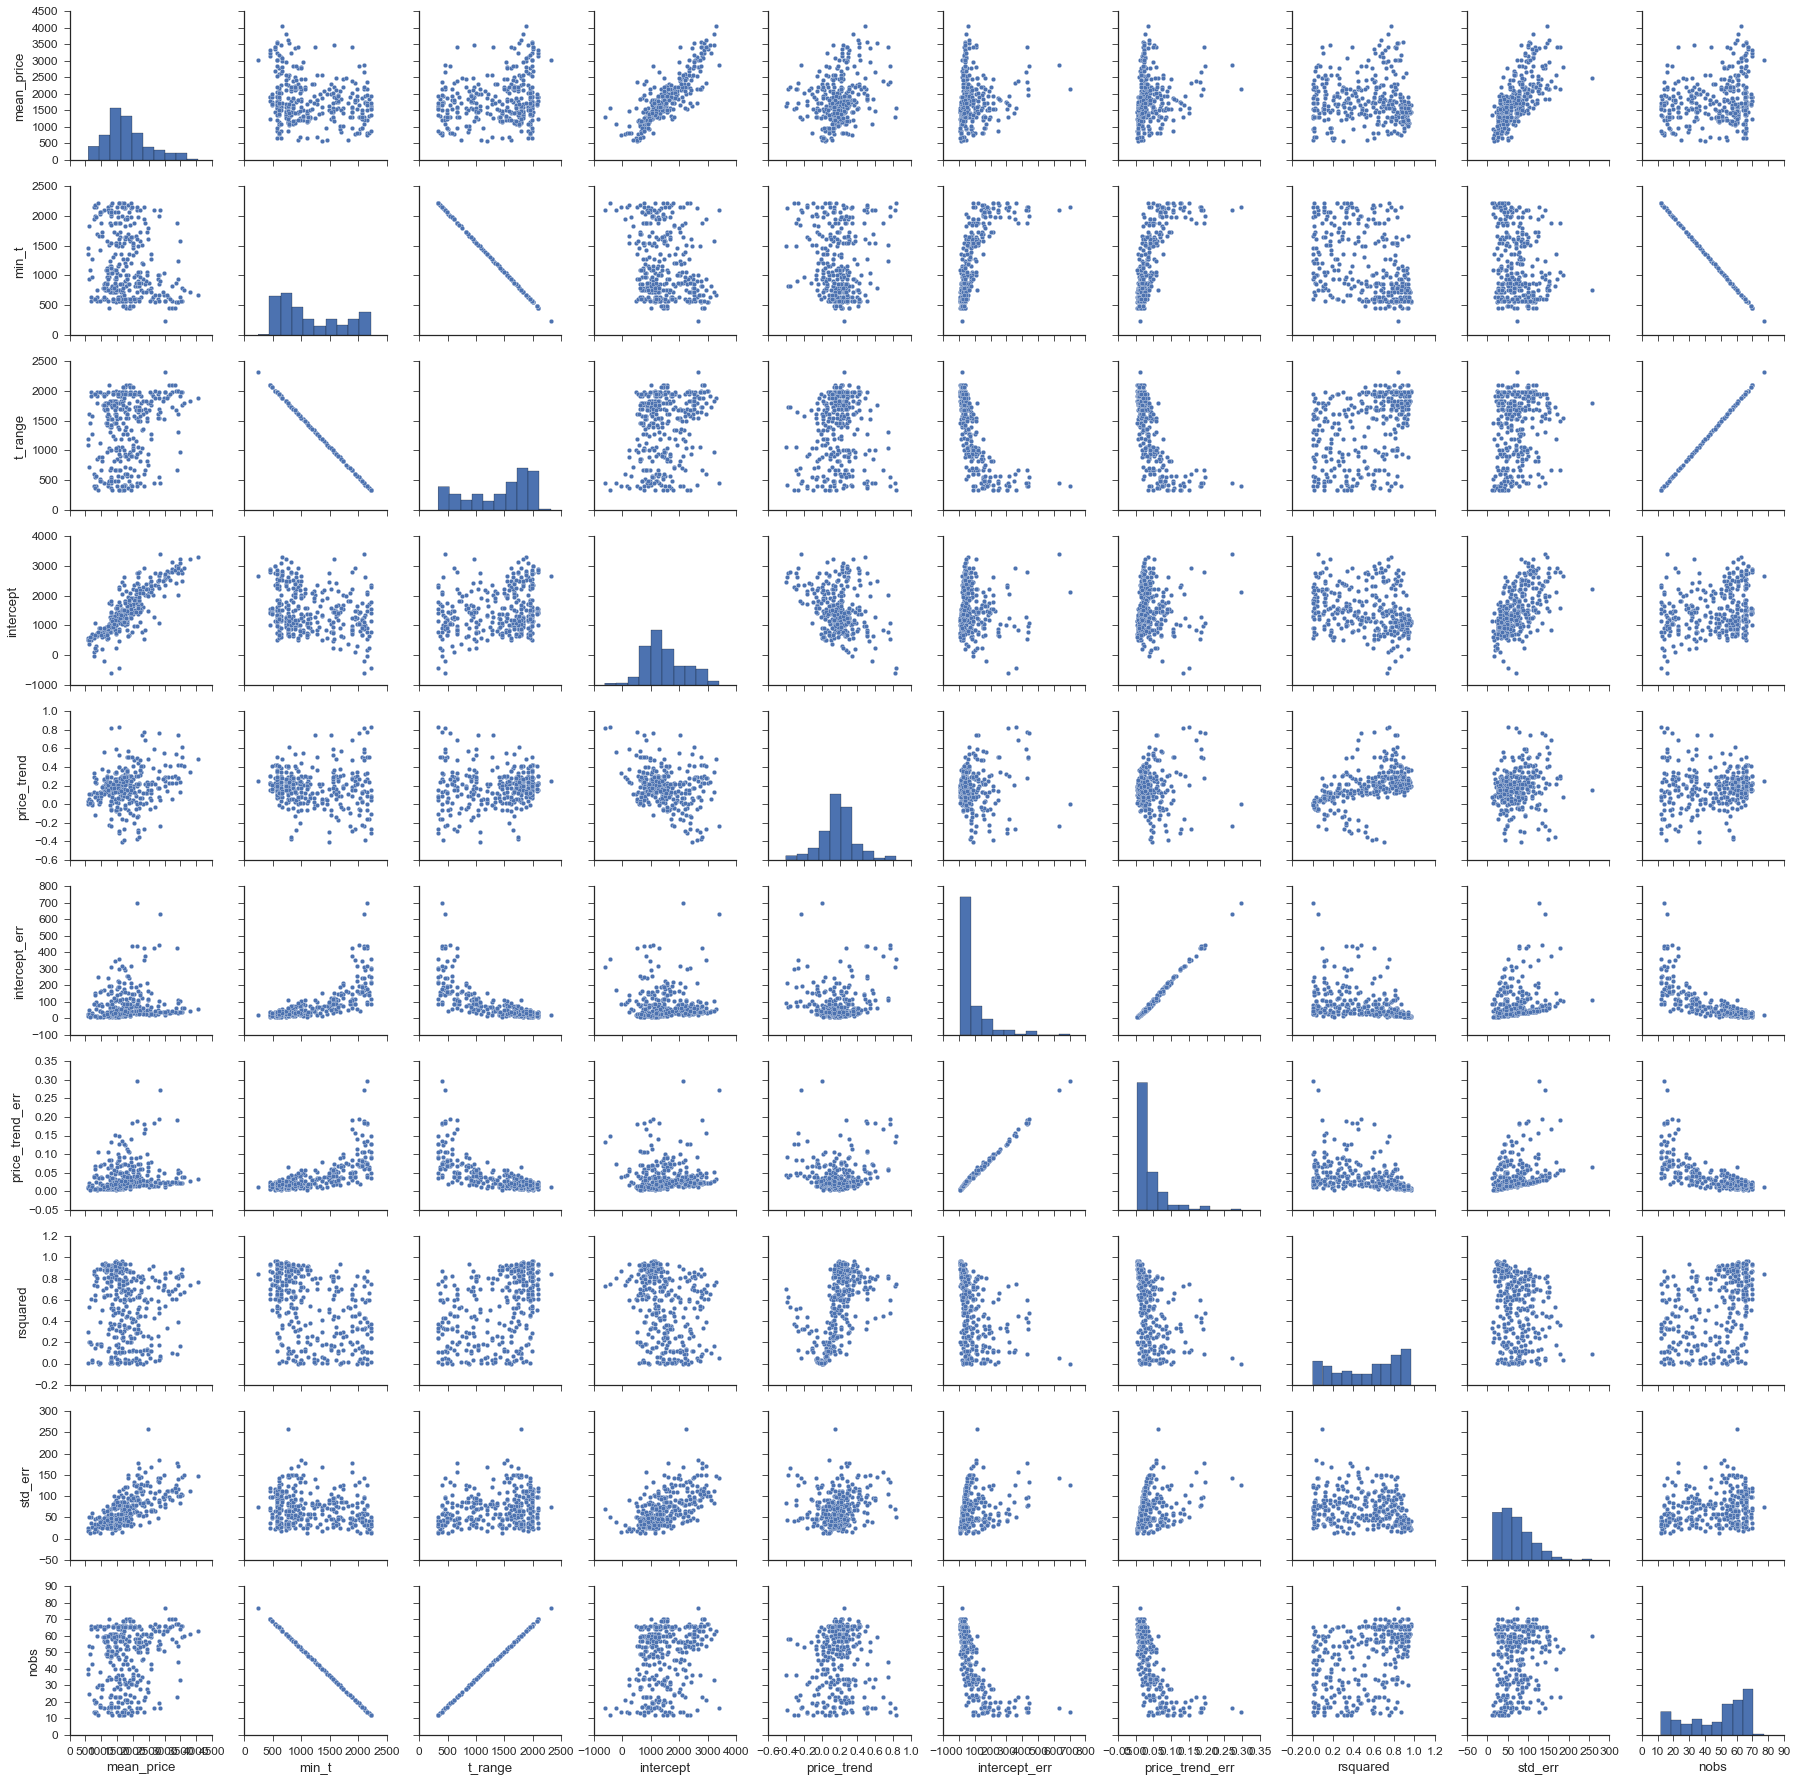

In [19]:
sns.pairplot(l)

Here is a widget where one can plot both the housing price data and a linear fit of the data. Simply select the neighborhood by varying the plot_num.

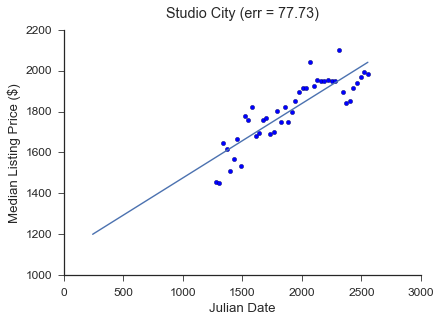

In [20]:
plot_num = 107

plt.title(names[plot_num]['RegionName'] + ' (err = ' + str(l['std_err'][plot_num])[:5] +')', y = 1.03) #make a title that is the neighborhood price history
plt.scatter(ts['time'],ts[plot_num]) #scatter the pricing trends
plt.plot(ts['time'], np.array(l['price_trend'][plot_num]*ts['time']) + l['intercept'][plot_num]) #plot the linear fit to the pricing trend to check
plt.xlabel('Julian Date')
plt.ylabel('Median Listing Price ($)')
sns.despine() # make the plot pretty

Note that in each type of file, e.g. "...1Bedroom.csv", "...2Bedroom.csv", a different number of neighborhoods are tracked